In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

folder_path = r"D:\USTH\Year_3\Internship\DeffendThesis\Defend-Thesis\Data"
file_name = "Data_UF_cleaned.xlsx"


df = pd.read_excel(f"{folder_path}\\{file_name}")
# Create a working copy
df_seg = df.copy()

# Bước 1: Convert từ text dạng day/month/year thành datetime
df_seg['Ngày tạo'] = pd.to_datetime(df_seg['Ngày tạo'], format='%d/%m/%Y', errors='coerce')



df_seg['Ngày tạo'] = (df_seg['Ngày tạo'] - df_seg['Ngày tạo'].min()).dt.days


# Step 3: Select relevant columns
df_seg = df_seg[['Doanh thu', 'Gói internet', 'Ngày tạo']]

# Step 4: Drop rows with missing values
df_seg = df_seg.dropna()

# Step 5: Encode 'Gói internet' (Package Type)
le = LabelEncoder()
df_seg['Gói internet'] = le.fit_transform(df_seg['Gói internet'])

# Show cleaned and ready-to-cluster data
df_seg  # Hiển thị 5 dòng đầu tiên của DataFrame



,Doanh thu,Gói internet,Ngày tạo
0,39900.0,14,0
1,39900.0,14,0
2,39900.0,14,0
3,39900.0,19,0
4,0.0,6,0
...,...,...,...
23618,39900.0,19,365
23619,239400.0,19,365
23620,518700.0,19,365
23621,0.0,19,365


In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [10]:
# ------------------------------------------
# STEP 1: Standardize the data
# Why? Because K-Means uses distance. We want all features (e.g., Revenue, Usage) to have the same weight.
# ------------------------------------------
scaler = StandardScaler()
df_seg[['Doanh thu', 'Gói internet', 'Ngày tạo']]= scaler.fit_transform(df_seg[['Doanh thu', 'Gói internet', 'Ngày tạo']])


df_seg

,Doanh thu,Gói internet,Ngày tạo
0,-0.140838,0.456741,-1.748611
1,-0.140838,0.456741,-1.748611
2,-0.140838,0.456741,-1.748611
3,-0.140838,1.192078,-1.748611
4,-0.590225,-0.719798,-1.748611
...,...,...,...
23618,-0.140838,1.192078,1.144686
23619,2.106097,1.192078,1.144686
23620,5.251805,1.192078,1.144686
23621,-0.590225,1.192078,1.144686


In [11]:
def optimise_kmeans(data,max_k):
    means = []
    inertias = []
    
    for k in range (1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Cluster')
    plt.ylabel('Inertial')
    plt.show()

In [12]:
print(df_seg[['Gói internet', 'Doanh thu']].info())
print(df_seg[['Gói internet', 'Doanh thu']].head())


<class 'pandas.core.frame.DataFrame'>
Index: 20699 entries, 0 to 23622
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gói internet  20699 non-null  float64
 1   Doanh thu     20699 non-null  float64
dtypes: float64(2)
memory usage: 485.1 KB
None
   Gói internet  Doanh thu
0      0.456741  -0.140838
1      0.456741  -0.140838
2      0.456741  -0.140838
3      1.192078  -0.140838
4     -0.719798  -0.590225


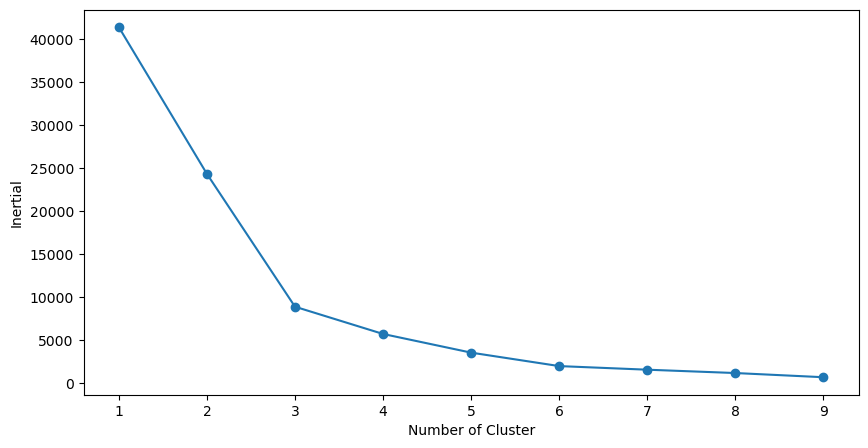

In [13]:
optimise_kmeans(df_seg[['Gói internet', 'Doanh thu']],10)

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_seg[['Gói internet', 'Doanh thu']])

KMeans(n_clusters=3)
df_seg['kmean_3'] = kmeans.labels_
df_seg

,Doanh thu,Gói internet,Ngày tạo,kmean_3
0,-0.140838,0.456741,-1.748611,1
1,-0.140838,0.456741,-1.748611,1
2,-0.140838,0.456741,-1.748611,1
3,-0.140838,1.192078,-1.748611,1
4,-0.590225,-0.719798,-1.748611,0
...,...,...,...,...
23618,-0.140838,1.192078,1.144686,1
23619,2.106097,1.192078,1.144686,2
23620,5.251805,1.192078,1.144686,2
23621,-0.590225,1.192078,1.144686,1


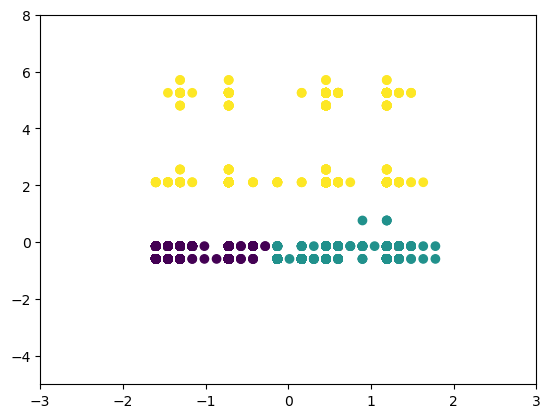

In [15]:
plt.scatter(x = df_seg['Gói internet'],y = df_seg['Doanh thu'], c =df_seg['kmean_3'] )
plt.xlim(-3,3)
plt.ylim(-5,8)
plt.show()